![flower](https://i.pinimg.com/600x315/8f/90/64/8f90647f0cae2a4f20704186a5441d8a.jpg)

# Best Maui Neighborhood to buy a property. 

## Table of contents
* #### [Introduction](#introduction)
* #### [Data](#data)
* #### [Methodology](#methodology)
* #### [Results and Discussion](#results)
* #### [Conclusion](#conclusion)
* #### [References](#references)

## Introduction <a name="introduction"></a>

***

### Maui, Hawaii is one of the best places for tourism in the United States and therefore is a good location for a property investment. Using location data to explore a geographical location, I'll be trying to determine which neighborhood of Maui will be the best place for that purpose. One of the main factors is, of course, the place is being close to the Pacific ocean. However, the place should also be located near some popular venues (preferably walking distance). I will use location data to find the best property to buy.

***

   ## Data <a name="data"></a>

***

### Let's find some data online and create a dataframe from it. 

#### 1. I’ll create a dataframe which consist of Zip Codes and City names for Cities that have the most population. Then, I’ll add longitude and latitude for all Cities. 
#### 2. After that, I will explore the dataframe with Foursquare API.

***

### Neighborhood Candidates

Let's create latitude & longitude coordinates for all neighborhoods. We will create a dataframe with all available neighborhoods for Maui island.

`Let's first import all libraries and dependencies we will need for our tasks`

In [1]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
print('Geopy installed and imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
print('Folium installed and imported.')

Solving environment: / ^C
failed

CondaError: KeyboardInterrupt

Folium installed and imported.


In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import matplotlib for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


#### I will scrape the github page with zipcodes for data and then read it into a *pandas* dataframe. The result we need is a dataframe with all Maui neighborhoods, and its latitude and longitude coordinates.

`Here is some python code to solve the above task.`

In [6]:
# GET the response from the web page using requests library
res = requests.get("https://github.com/vikapats/Coursera_Capstone/blob/master/Hwaiian_data.csv")

# fetch content using pandas
df = pd.read_html(res.content)[0]

# Let's take a quick look at the data
df

,Unnamed: 0,ZIP Code,Classification,City,Population
0,NaN,96708,General,Haiku,10220
1,NaN,96713,General,Hana,1990
2,NaN,96729,PO Box,Hoolehua,1303
3,NaN,96732,General,Kahului,24816
4,NaN,96733,PO Box,Kahului,0
5,NaN,96753,General,Kihei,26892
6,NaN,96757,PO Box,Kualapuu,758
7,NaN,96761,General,Lahaina,22156
8,NaN,96763,PO Box,Lanai City,3135
9,NaN,96767,PO Box,Lahaina,0


In [7]:
# Let's remove Unnamed: 0 column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,ZIP Code,Classification,City,Population
0,96708,General,Haiku,10220
1,96713,General,Hana,1990
2,96729,PO Box,Hoolehua,1303
3,96732,General,Kahului,24816
4,96733,PO Box,Kahului,0
5,96753,General,Kihei,26892
6,96757,PO Box,Kualapuu,758
7,96761,General,Lahaina,22156
8,96763,PO Box,Lanai City,3135
9,96767,PO Box,Lahaina,0


In [8]:
# Let's leave only General ZIP codes as PO Boxes have small to none population
df_maui = df[df['Classification'] != "PO Box"]
df_maui

,ZIP Code,Classification,City,Population
0,96708,General,Haiku,10220
1,96713,General,Hana,1990
3,96732,General,Kahului,24816
5,96753,General,Kihei,26892
7,96761,General,Lahaina,22156
10,96768,General,Makawao,17668
12,96779,General,Paia,3088
15,96790,General,Kula,8065
16,96793,General,Wailuku,29549


In [9]:
# Let's now add the latitude and longitude coordinates of each City
df_latlon = pd.DataFrame(columns=['City','Latitude', 'Longitude'])

for value in df_maui['City']:
    address = '{}, Hawaii'.format(value)
    geolocator = Nominatim(user_agent="maui_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    df_latlon = df_latlon.append({'City': value,
                      'Latitude': latitude,
                      'Longitude': longitude}, ignore_index=True)
    
df_latlon

,City,Latitude,Longitude
0,Haiku,20.914390,-156.322960
1,Hana,20.757399,-155.987985
2,Kahului,20.874771,-156.452983
3,Kihei,20.747626,-156.454990
4,Lahaina,20.873877,-156.677678
5,Makawao,20.853916,-156.310393
6,Paia,20.902457,-156.372721
7,Kula,20.792026,-156.323712
8,Wailuku,20.890544,-156.503093


In [10]:
# Let's find the latitude & longitude of Maui.
address = 'Maui, Hawaii'

geolocator = Nominatim(user_agent="maui_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Maui are: {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Maui are: 20.802956799999997, -156.31068331602177.


In [34]:
# create map of Maui using latitude and longitude values
map_maui = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_latlon['Latitude'], df_latlon['Longitude'], df_latlon['City']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_maui)  
    
map_maui

## Methodology <a name="methodology"></a>

***

### Let's now explore the Cities of Maui using Foursquare Api.

#### 1. We will get top 100 venues for every city and then create a bar plot to see visualize top countries with most values.
#### 2.  I will visualize and analyze data with Python.

***

`Here is some python code to solve the above task.`

In [12]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'your_CLIENT_ID_here' # your Foursquare ID
CLIENT_SECRET = 'your_CLIENT_SECRET_here' # your Foursquare Secret
VERSION = '20200615' # Foursquare API version
print("You're connected to API.")

You're connected to API.


#### Now, let's get the top 100 venues for each city within a radius of 500 meters.

In [13]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
# Now let's create a new dataframe with venues while ptinting names of all Neighborhoods
maui_venues = getNearbyVenues(names=df_latlon['City'],
                                   latitudes=df_latlon['Latitude'],
                                   longitudes=df_latlon['Longitude']
                                  )

Haiku
Hana
Kahului
Kihei
Lahaina
Makawao
Paia
Kula
Wailuku


In [15]:
# Let's take a look on a new dataframe
maui_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Haiku,20.91439,-156.32296,Nuka,20.914555,-156.323170,Sushi Restaurant
1,Haiku,20.91439,-156.32296,Haleakala Bike Company,20.913615,-156.322810,Bike Shop
2,Haiku,20.91439,-156.32296,The Greek Oven Maui,20.913214,-156.322743,Mediterranean Restaurant
3,Haiku,20.91439,-156.32296,Colleen's,20.913170,-156.322441,Café
4,Haiku,20.91439,-156.32296,Maui Kombucha,20.914213,-156.323981,Tea Room


In [16]:
# Let's check how many venues were returned
print('{} venues were returned by Foursquare.'.format(maui_venues.shape[0]))

234 venues were returned by Foursquare.


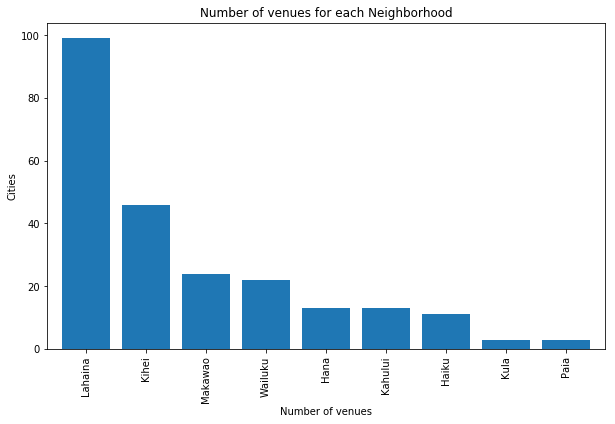

In [17]:
# generate histogram

# Step 1: get data
maui_count = maui_venues.groupby('Neighborhood').count()
maui_count.sort_values(['Venue'], ascending=False, axis=0, inplace=True)

# Step 2: plot data
maui_count['Venue'].plot(kind='bar', figsize=(10, 6), width=0.8)

plt.xlabel('Number of venues') # add to x-label to the plot
plt.ylabel('Cities') # add y-label to the plot
plt.title('Number of venues for each Neighborhood') # add title to the plot

plt.show()

In [18]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(maui_venues['Venue Category'].unique())))

There are 107 uniques categories.


In [23]:
# Let's now analize each neighborhood with one hot encoding
maui_onehot = pd.get_dummies(maui_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
maui_onehot['Neighborhood'] = maui_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [maui_onehot.columns[-1]] + list(maui_onehot.columns[:-1])
maui_onehot = maui_onehot[fixed_columns]

maui_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Big Box Store,Bike Shop,Board Shop,Boat or Ferry,Boutique,Breakfast Spot,Burger Joint,Café,Camera Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Dessert Shop,Diner,Dive Shop,Dry Cleaner,Fabric Shop,Fast Food Restaurant,Flower Shop,Food Truck,French Restaurant,Garden,Garden Center,Gas Station,Gastropub,General Travel,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Home Service,Hostel,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Liquor Store,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Moving Target,Museum,New American Restaurant,Other Repair Shop,Park,Pet Store,Pharmacy,Pizza Place,Record Shop,Rental Car Location,Resort,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Spa,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Tourist Information Center,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Women's Store,Yoga Studio
0,Haiku,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Haiku,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Haiku,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haiku,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Haiku,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [24]:
# Let's now group by frequancy (by taking mean)
maui_grouped = maui_onehot.groupby('Neighborhood').mean().reset_index()
maui_grouped

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Big Box Store,Bike Shop,Board Shop,Boat or Ferry,Boutique,Breakfast Spot,Burger Joint,Café,Camera Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Dessert Shop,Diner,Dive Shop,Dry Cleaner,Fabric Shop,Fast Food Restaurant,Flower Shop,Food Truck,French Restaurant,Garden,Garden Center,Gas Station,Gastropub,General Travel,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Home Service,Hostel,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Liquor Store,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Moving Target,Museum,New American Restaurant,Other Repair Shop,Park,Pet Store,Pharmacy,Pizza Place,Record Shop,Rental Car Location,Resort,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Spa,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Tourist Information Center,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Women's Store,Yoga Studio
0,Haiku,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000
1,Hana,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.153846,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Kahului,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [25]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in maui_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = maui_grouped[maui_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Haiku----
               venue  freq
0         Food Truck  0.18
1          Bike Shop  0.09
2               Café  0.09
3  Martial Arts Dojo  0.09
4       Gourmet Shop  0.09


----Hana----
                 venue  freq
0  Hawaiian Restaurant  0.15
1                Hotel  0.15
2                Beach  0.15
3               Resort  0.08
4       Baseball Field  0.08


----Kahului----
               venue  freq
0        Coffee Shop  0.15
1      Big Box Store  0.15
2  Mobile Phone Shop  0.08
3         Food Truck  0.08
4     Sandwich Place  0.08


----Kihei----
                  venue  freq
0           Pizza Place  0.07
1  Fast Food Restaurant  0.07
2      Sushi Restaurant  0.04
3   Japanese Restaurant  0.04
4              Pharmacy  0.04


----Kula----
               venue  freq
0             Garden  0.33
1  Other Repair Shop  0.33
2        Dry Cleaner  0.33
3  Accessories Store  0.00
4           Pharmacy  0.00


----Lahaina----
                venue  freq
0      Ice Cream Shop  0.07
1  Seafo

In [26]:
# Let's create a function which will sort venues in decending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
# Not let's create a dataframe with 5 most common venues for each neighborhood
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = maui_grouped['Neighborhood']

for ind in np.arange(maui_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(maui_grouped.iloc[ind, :], num_top_venues)


## Results and Discussion <a name="results"></a>

***

#### Now we have a new dataframe with most common venues and can choose a neighborhood based on that.

In [32]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Haiku,Food Truck,Martial Arts Dojo,Mediterranean Restaurant,Café,Sushi Restaurant
1,Hana,Hotel,Hawaiian Restaurant,Beach,Ice Cream Shop,Resort
2,Kahului,Big Box Store,Coffee Shop,Food Truck,Cosmetics Shop,Mobile Phone Shop
3,Kihei,Pizza Place,Fast Food Restaurant,Japanese Restaurant,Rental Car Location,Mexican Restaurant
4,Kula,Other Repair Shop,Dry Cleaner,Garden,Yoga Studio,Food Truck
5,Lahaina,Ice Cream Shop,Seafood Restaurant,Art Gallery,Clothing Store,Café
6,Makawao,Home Service,Coffee Shop,Arts & Crafts Store,Restaurant,Boutique
7,Paia,Garden Center,Home Service,Basketball Court,French Restaurant,Cosmetics Shop
8,Wailuku,American Restaurant,Hostel,Asian Restaurant,Pharmacy,Boutique


***

#### As I already mentioned, Hawaii is one of the best places in the United Staes (or even in a word?) to visit as a tourist. I've limited my investigation to Maui island only because I believe it has more potential than other islands. It's less rural than Kauai and not overpopulated as Oahu.
#### According to the data I analyzed, these three neighborhoods, ***Lahaina, Kihei, and Wailuku*** should be good to buy an investment property (Airbnb rent or similar). They have the most population, conveniently located and have many venues within 500 meters of a city's center.

***

## Conclusion <a name="conclusion"></a>

***

#### Maui is one of the top places for tourism in the United States, and therefore it's a good place for property investment. Even if you're not ready to buy it yet, visit Hawaii for fun! It has many interesting venues to explore.

***

## References <a name="references"></a>

***

#### 1. Wiki: https://en.wikipedia.org/wiki/Module:Location_map/data/United_States_Maui
#### 2. Zip codes: https://www.zip-codes.com/county/hi-maui.asp
#### 3. Foursquare: https://foursquare.com/

***

# Aloha!